### Cleaning Cocoa Farms Data

In [7]:
import pandas as pd
import fiona 
from shapely.geometry import shape
from shapely.validation import explain_validity
import geopandas as gp
import matplotlib.pyplot as plt
my_file = gp.read_file(r'C:\Users\OneHeart\Desktop\Ghana_polygons\Silas.shp')
my_file



,OBJECTID_1,OBJECTID,FarmCode,OwnerCode,OwnerFirst,OwnerSurna,OwnerSP0Id,OwnerSP0Na,OwnerSP1Id,OwnerSP1Na,...,overlaps_2,overlaps_3,overlaps_4,dt_last_up,userEmail_,worldbound,worldbou_1,Shape_Leng,Shape_Area,geometry
0,1,137656,EGL-WS06B-01-255-001,EGL-WS06B-01-255,MATHEW,KWARTENG,F1691F7F-C745-4F66-8B08-0177B168454A,GHA_COC - Ghana,DCB604AA-44A8-43F3-B861-276C818BF419,WESTERN REGION,...,5.63840,5.63840,None,2023/02/08,o.osei2211072@touton.io,GHA,1,0.002197,2.124280e-07,"MULTIPOLYGON (((-2.07264 6.26458, -2.07265 6.2..."
1,2,137657,EGL-WS02B-04-012-001,EGL-WS02B-04-012,OSEI,EMMANUEL,F1691F7F-C745-4F66-8B08-0177B168454A,GHA_COC - Ghana,DCB604AA-44A8-43F3-B861-276C818BF419,WESTERN REGION,...,None,None,None,2020/02/02,adm_it@touton.io,GHA,1,0.010670,2.108214e-06,"POLYGON ((-2.37924 5.80303, -2.37924 5.80303, ..."
2,3,137658,EGL-WS02D-24-005-002,EGL-WS02D-24-005,ANDREW,AGYAPONG,F1691F7F-C745-4F66-8B08-0177B168454A,GHA_COC - Ghana,DCB604AA-44A8-43F3-B861-276C818BF419,WESTERN REGION,...,None,None,None,2020/01/31,adm_it@touton.io,GHA,1,0.006031,9.340430e-07,"POLYGON ((-2.5056 5.89996, -2.5056 5.89996, -2..."
3,4,137661,EGL-BA02A-43-042-001,EGL-BA02A-43-042,AMPONSAH,CECILIA,F1691F7F-C745-4F66-8B08-0177B168454A,GHA_COC - Ghana,E8E6116E-2E1B-4176-9BF5-447C4DFE8E2F,BONO REGION,...,None,None,None,2023/09/06,t.melchisedec23062089@touton.io,GHA,1,0.003428,7.184315e-07,"POLYGON ((-2.7999 7.14088, -2.7999 7.14088, -2..."
4,5,137664,EGL-WS13A-20-013-002,EGL-WS13A-20-013,BENJAMIN,ANANE,F1691F7F-C745-4F66-8B08-0177B168454A,GHA_COC - Ghana,DCB604AA-44A8-43F3-B861-276C818BF419,WESTERN REGION,...,None,None,None,2022/12/13,e.enimel2211076@touton.io,GHA,1,0.003140,5.526795e-07,"POLYGON ((-2.54233 5.11196, -2.54233 5.11195, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34895,34896,204514,EGL-BA06A-27-032-002,EGL-BA06A-27-032,JOSEPH,APPIAH,F1691F7F-C745-4F66-8B08-0177B168454A,GHA_COC - Ghana,CAC55479-6590-4D7A-A854-CA2320245F74,AHAFO REGION,...,98.95729,98.95729,None,2019/07/28,adm_it@touton.io,GHA,1,0.003388,7.629935e-07,"POLYGON ((-2.46986 6.62825, -2.46986 6.62824, ..."
34896,34897,204515,EGL-WS12C-10-026-001,EGL-WS12C-10-026,LORD,AYIKUA,F1691F7F-C745-4F66-8B08-0177B168454A,GHA_COC - Ghana,DCB604AA-44A8-43F3-B861-276C818BF419,WESTERN REGION,...,None,None,None,2020/01/28,adm_it@touton.io,GHA,1,0.000262,7.500000e-10,"POLYGON ((-2.55833 5.60222, -2.55833 5.60222, ..."
34897,34898,204517,EGL-WS14C-07-021-001,EGL-WS14C-07-021,KWAME,ASEM,F1691F7F-C745-4F66-8B08-0177B168454A,GHA_COC - Ghana,DCB604AA-44A8-43F3-B861-276C818BF419,WESTERN REGION,...,.27359,.27359,None,2023/01/20,o.offoh2211074@touton.io,GHA,1,0.008228,2.267786e-06,"POLYGON ((-1.96145 5.08896, -1.96145 5.08896, ..."
34898,34899,204518,EGL-WS12D-14-047-003,EGL-WS12D-14-047,MAMUNA,MAHAMA,F1691F7F-C745-4F66-8B08-0177B168454A,GHA_COC - Ghana,DCB604AA-44A8-43F3-B861-276C818BF419,WESTERN REGION,...,None,None,None,2024/06/02,t.evans230620126@touton.io,GHA,1,0.002938,3.603305e-07,"POLYGON ((-2.53439 5.57805, -2.53439 5.57805, ..."


<Axes: >

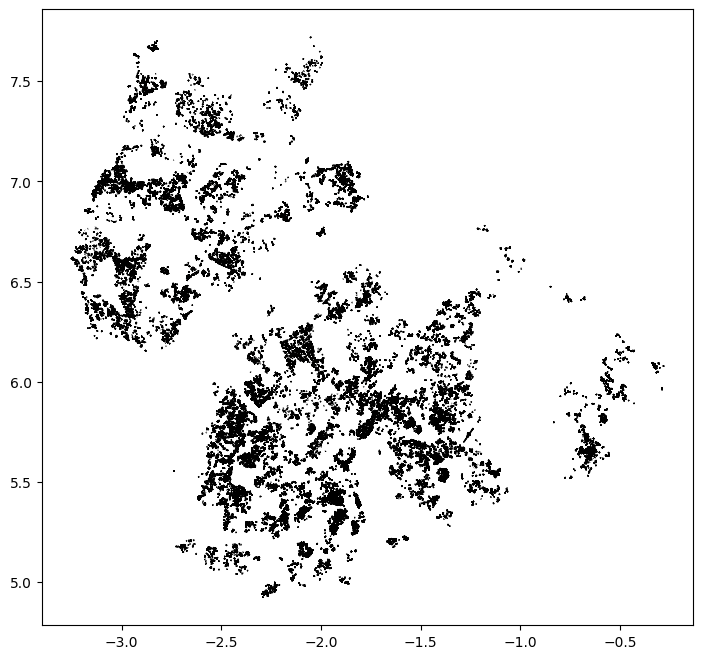

In [8]:
fig, ax = plt.subplots(figsize=(12, 8)) 
my_file.plot(ax=ax, color='lightblue', edgecolor='black')


In [9]:
pip install fiona 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
#Checking for issues with polygons
def check_geometries(my_file):
    issues = []
    for idx, geom in enumerate(my_file.geometry):
        if geom is not None:  
            if not geom.is_valid:
                issues.append({
                    'index': idx,
                     'geometry': geom,
                    'validity': explain_validity(geom)
                })
    return issues

# Check geometries
issues = check_geometries(my_file)

print("Issues with geometries:")
for issue in issues:
    final_issue = (f"Feature index: {issue['index']}, Issue: {issue['validity']}")
    print(final_issue)



Issues with geometries:
Feature index: 3, Issue: Ring Self-intersection[-2.79990099999998 7.14087900000004]
Feature index: 32, Issue: Ring Self-intersection[-2.12397800000002 5.81948699999998]
Feature index: 73, Issue: Ring Self-intersection[-1.84282100000001 7.03011300000014]
Feature index: 104, Issue: Ring Self-intersection[-1.84721099999996 6.24446]
Feature index: 105, Issue: Ring Self-intersection[-1.96665399999995 5.0925180000001]
Feature index: 106, Issue: Ring Self-intersection[-1.73417799999999 5.84026899999998]
Feature index: 113, Issue: Ring Self-intersection[-1.37636599999996 6.21169399999997]
Feature index: 358, Issue: Ring Self-intersection[-1.329453 6.21661400000011]
Feature index: 434, Issue: Ring Self-intersection[-1.24503499999992 6.27726899999999]
Feature index: 435, Issue: Ring Self-intersection[-3.07020999999986 6.62856600000009]
Feature index: 461, Issue: Ring Self-intersection[-2.31717799999996 5.90253200000006]
Feature index: 465, Issue: Ring Self-intersection[-1

In [18]:


def check_geometries(my_file):
    issues = []
    for idx, geom in enumerate(my_file.geometry):
        if geom is not None:  # Check if geometry is not None
            if not geom.is_valid:
                issues.append({
                    'index': idx,
                    'geometry': geom,
                    'validity': explain_validity(geom)
                })
    return issues

# Check geometries
issues = check_geometries(my_file)

# Convert issues to DataFrame
issues_df = pd.DataFrame(issues)

# Set display options to show all rows and columns
pd.set_option('display.max_rows', 10000)  # Display all rows
pd.set_option('display.max_columns', 10000)  # Display all columns
pd.set_option('display.max_colwidth', 1000)  # Display full column content

# Print DataFrame
print("Issues with geometries:")
print(issues_df.head(5))


Issues with geometries:
   index  \
0      3   
1     32   
2     73   
3    104   
4    105   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:


from shapely.strtree import STRtree

gp = my_file.to_crs(epsg=4326)

# Creating a spatial index for fast lookup
spatial_index = gp.sindex

# Creating an empty list to store overlap information
overlaps = []

# Using the spatial index to find potential overlaps
for i, poly1 in gp.iterrows():
    possible_matches_index = list(spatial_index.intersection(poly1.geometry.bounds))
    possible_matches = gdf.iloc[possible_matches_index]

    for j, poly2 in possible_matches.iterrows():
        if i >= j:  
            continue
        if poly1.geometry.overlaps(poly2.geometry):
            overlaps.append({
                'polygon_1_index': i,
                'polygon_2_index': j,
                'geometry_1': poly1.geometry,
                'geometry_2': poly2.geometry
            })

# Convert overlap information to DataFrame
overlaps_df = pd.DataFrame(overlaps)

# Display overlaps
print("Overlap information:")
print(overlaps_df)
